# **Lab 5: Fully Connected Network (1)**

<p align="justify"> In this Lab we are going to classify a dataset of images distributed in 10 classes (multi-class  classification) using a fully connected network (FCN).<p>

<p align="justify"> The **MNIST** database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. There are 10 different classes of digits, from 0 to 9
. All the images have a size of 28x28 pixels. The MNIST database contains 70,000 images, that we have divided in 60% training, 20% validation and 20% testing. The dataset has the following structure: </p>


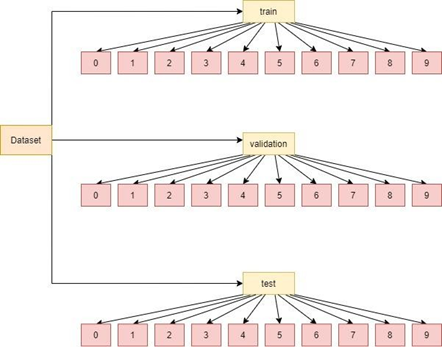



To classify these handwritten digits, we are going to follow the next steps:



*   Create a Fully Connected Neural Network (FCN) and train it to be able to classify these images.
*   Validate our model performance using validation metrics




<a name="1"></a>
## Environment set up

<p align="justify"> We are going to use Pytorch as our machine learning platform.</p>

<p align="justify"> PyTorch is an open-source machine learning library and deep learning framework developed by Facebook's AI Research lab (FAIR). Since we are going to build our model in Pytorch, you can use Pytorch tutorials from (https://pytorch.org/tutorials/) for extra help.</p>


<a name="1"></a>
## 	**1. Importing necessary libraries and dataset**






In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

#### Setting the Device:
When working with Pytorch, we must check if a CUDA-compatible GPU is available, and if so, we set the device to 'cuda'; otherwise, we use the CPU ('cpu').

**Note:** In Colab, change your *runtime type* from the top right dropdown menu to GPU before runnig the notebook.


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### Define Hyperparameters:
In machine learning, a hyperparameter is a parameter whose value is set before the learning process begins. These parameters are not learned from the data, but are set by the user to control the learning process.

Before we start, we should specify hyperparameters for our neural network, including input size, hidden layer size, the number of classes, the size of the validation set, the number of training epochs, batch size, and learning rate:

In [ ]:
input_size = 784
hidden_size = 50
num_classes = 10
validation_size = 0.2
num_epochs = 10
batch_size = 100


**Question**: Why is our input size 784?

<font color='red'>The input size is 784 because each MNIST image is a grayscale image of 28x28 pixels, and each pixel in the image represents one feature in the input vector. So, for a fully connected network (FCN), 28x28 = 784 the input layer needs 784 neurons to match the total number of pixels in the image.


####  Define Data Transformations:
<p align="justify">Before we train our model, we need to pre-process the data. Data pre-processing is a data mining technique to turn the raw data gathered from diverse sources into cleaner information that is more suitable for work. In other words, it’s a preliminary step that takes all the available information to organize it, sort it, and merge it. Thanks to the **Pytorch Transform** library we can use one single function to do all of the pre-processing operations on the datasets. The transform variable defines a series of transformations to be applied to the input data. </p>

<p align="justify">PyTorch transforms function can be used for various operations on images, including *data augmentation*. During data loading, you may easily apply various image processing and augmentation techniques to your dataset by using PyTorch's transformations module. Data augmentation is a typical deep learning technique that involves transforming the input images to artificially expand the size of the training dataset. This may enhance the resilience and generalization of the model.</p>

<p align="justify">The first step of our pre-processing is converting image matrices to **tensors**. Tensors are multi-dimensional arrays in PyTorch that resemble NumPy arrays but have extra features specifically made to speed up deep learning operations. The core data structure in PyTorch is called a tensor, and it is used to represent and work with data, such as input data, model parameters, and gradients during training. The automatic differentiation system of PyTorch, which is essential for training neural networks, is built around tensors.</p>


<p align="justify">The seond step of our pre-processing is scaling the image data. If you print an image without plotting it, you will see that each image is stored as a matrix of numbers from 0 to 255. To normalize our data, we need to rescale these images (matrices) between range of 0 to 1 using **Normalize** function.</p>



Here, we convert the data to PyTorch tensors and normalize it:

In [ ]:
transform = transforms.Compose([
     transforms.ToTensor(),
      transforms.Normalize((0.5,), (0.5,))
 ])

**Question:** What other transformations do you think would be good for this type of data?

<font color='red'> We can use  GaussianBlur, as well as RandomRoation (however we should be careful with the angles used so the digits dont get mixed up) , RandomAffine, RandomCrop, RandomPerspective ,
as other transformations for this type of data.



#### Load the MNIST Dataset:
Next we load the MNIST dataset, both the training and test sets from torchvision datasets. The root parameter specifies the directory to save the dataset, and the transform parameter applies the previously defined transformations to the data:

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='../../data',
                                           train=True,
                                           transform=transform,
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data',
                                          train=False,
                                          transform=transform,
                                          download=False)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.5MB/s]


Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 489kB/s]


Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.94MB/s]


Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.74MB/s]

Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw



####  Split the Training Data into Training and Validation Sets:
<p align="justify"> - Use the train_test_split function split the original training dataset into a new training set (train_dataset) and a validation set (val_dataset) based on the specified validation_size in hyperparameters. Set the random staet to 42:

In [ ]:
train_dataset, val_dataset= train_test_split(train_dataset, test_size= 0.2, random_state=42)

### Dataloader
In deep learning frameworks Dataloaders are critical tools for managing data during model training. They streamline several tasks essential to handling large datasets, making the training process more efficient and effective.

Dataloader tasks:

**Loading:** Dataloaders manage loading data from your dataset files into memory, ensuring that data is readily available for each training batch.

**Batching:** They divide data into smaller batches automatically. Batching is important because it lets us update model weights gradually instead of all at once, optimizing memory usage and accelerating training.

**Shuffling:** Dataloaders can shuffle the data randomly with each new training epoch. This helps the model generalize better by preventing it from memorizing the data order, which can reduce overfitting.

**Parallelism:** Dataloaders often support parallel data loading, using multiple CPU cores to fetch data in the background. This reduces waiting time, especially with large datasets, and can significantly speed up the training process.

Now let's create our dataloaders for each set of data:

In [ ]:
# Data loaders for training and validation sets
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

# The test_loader remains unchanged for the test set
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


<a name="1"></a>
## **2. Visualization**

Now that we have loaded our datasets, we want to see some samples of each set:

train data samples:


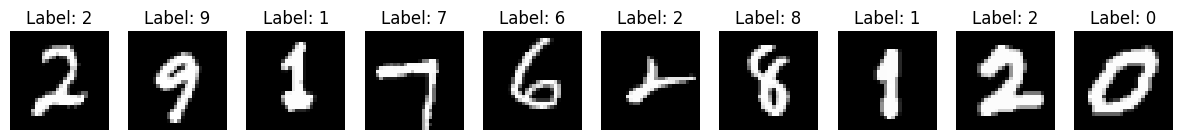

test data samples:


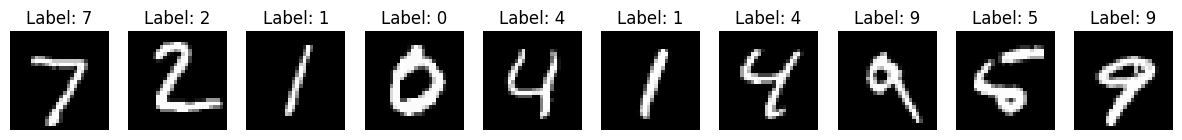

In [ ]:
# display samples from the training set
def show_samples(train_loader, num_samples=10):
    data_iter = iter(train_loader)
    images, labels = next(data_iter)
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

    for i in range(num_samples):
        ax = axes[i]
        ax.imshow(images[i].numpy().squeeze(), cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')

    plt.show()

# Visualize ten samples from the training set
print("train data samples:")
show_samples(train_loader, num_samples=10)
print("test data samples:")
show_samples(test_loader, num_samples=10)


<a name="1"></a>
## **3**. **Build the mode**l
For fully connected neural networks, there are essential points that define the architecture of our network:
* How many layers shuold the network have
* How many nodes (neurons) shuold we put in each of those layers
*	What activation function is used  at each of those layers
* which loss function is used
* which optimization algorithm is used
* how many training epochs to run before stopping
* The batch size within each epoch

<p align="justify">Since we are building a fully connected neural network, the size of our input data **must be a vector**. Instead of several 28x28 images, we need to have several vectors that are all length 784 (28*28=784).

For the moment, we will start defining only one single hidden layer.
Its size is a design decision and we can empirically choosen. Finally, the output of the last layer must be the same as number of classes we want to classify: 10. </p>
<p align="justify"></p>


In [ ]:
class FCNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FCNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) #input layer
        self.relu = nn.ReLU() #activation function
        self.fc2 = nn.Linear(hidden_size, num_classes) #hidden layer

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = FCNet(input_size, hidden_size, num_classes).to(device)
print(model)


FCNet(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


<a name="1"></a>
## **4. Optimizer and Loss function**

The optimizer and the loss function are essential components for training a neural network (NN).

<p align="justify">In order to reduce the model's error as indicated by the loss function, the optimizer must modify the model's parameters, i.e. weights and biases. The difference between the target values in the training data and the model's predictions is measured by the loss function. In order to reduce this loss during training, the optimizer iteratively modifies the model's parameters, thus directing the model toward improved performance. The neural network is able to learn and adapt to the underlying patterns in the data through the optimizer's minor tweaks to the model during this dynamic process, which eventually improves the neural network's accuracy and predictive power. The choice of optimizer and loss function is critical in determining how effectively and efficiently the neural network learns from the data and converges to a solution that accurately represents the desired mapping between inputs and outputs.</p>

In [ ]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss() # Loss function
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

**Question:** What other optimizers and loss functions can be useful for this task?

<font color='red'> For the loss funtion, we can use any other multi-class classification like the weighted cross entropy loss (even though it is for the unbalanced datasets) or Negative Log-Likelihood Loss - NLLLoss (it requires a log-softmax transformation to raw inputs before passing them to the loss function).

<font color='red'> For the optimizers, we can use Adam, which is as well a stochastic gradient descent method.




<a name="1"></a>
## **5. Build the train function**
<p align="justify">In this step we want to build separate train  and validation functions for our model. Building separate training and validation functions enables us to train and evaluate models effectively. The training function is responsible for adjusting the model's parameters to minimize the training loss, while the validation function assesses how well the model generalizes to unseen data. By keeping these processes distinct, we prevent data leakage, enable cross-validation, and ensure the reliability of our deep learning models as they learn, adapt, and perform well on unseen data:</p>





In [ ]:
def Train(model,train_loader,optimizer):
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Backprpagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    accuracy = (100 * correct / total)

    return loss.item(), accuracy


**Questions:**


*   Why did we reshape the images before moving them to GPU?
*   What does torch.max do?




<font color='red'> Doing the image reshape, it basically flattens the images into one dimension input vector with 784 elemenst, so they can be a batch input. The -1 parameter tells PyTorch to infer the size of the first dimension automatically based on the total number of elements and the size of the other dimension (784).

<font color='red'> The output of the network represents the raw scores for each class. After applying a softmax function, these scores can be interpreted as probabilities. Taking the class with the highest score (using torch.max), we are identifying the class that the model predicts as most likely for the given input aka the one with the highest probabilty.

<a name="1"></a>
## **6. Build the validation function**

In [ ]:
def Validate(model,val_loader):
  with torch.no_grad():
      correct = 0
      total = 0
      for images, labels in val_loader:
          images = images.reshape(-1, 28*28).to(device)
          labels = labels.to(device)

          # Forward pass
          outputs = model(images)
          loss = criterion(outputs, labels)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      accuracy = (100 * correct / total)
  return loss.item(),accuracy

**Question:**


*   What are the main differences between this validation function and train function? Why do you think this difference exists?

<font color='red'>The validate Function uses torch.no_grad() to disable gradient tracking, which saves memory and computational resources. Since it is for the validation phase, we only want to measure performance, not update the model.

<a name="1"></a>
## **7. Run training and validation**
<p align="justify"> Next we run our model and calculate the accuracy and loss for train and validation in each epoch:

In [ ]:
T_loss= []
v_loss =[]
T_acc = []
v_acc = []

for epoch in range(num_epochs):
  train_loss, train_acc = Train(model, train_loader, optimizer)
  val_loss, val_acc = Validate(model, val_loader)

  print ('Epoch [{}/{}], train Loss: {:.4f}, train acc: {:.4f}, val Loss: {:.4f} , val acc: {:.4f}'
            .format(epoch+1, num_epochs, train_loss,train_acc, val_loss,val_acc))
  T_loss.append(train_loss)
  v_loss.append(val_loss)
  T_acc.append(train_acc)
  v_acc.append(val_acc)


Epoch [1/10], train Loss: 1.9489, train acc: 40.4021, val Loss: 1.8663 , val acc: 58.5250
Epoch [2/10], train Loss: 1.5061, train acc: 66.0396, val Loss: 1.4332 , val acc: 70.5333
Epoch [3/10], train Loss: 1.1734, train acc: 73.4771, val Loss: 1.0931 , val acc: 76.6583
Epoch [4/10], train Loss: 1.0284, train acc: 77.9625, val Loss: 0.8732 , val acc: 79.5167
Epoch [5/10], train Loss: 0.8594, train acc: 80.5208, val Loss: 0.7280 , val acc: 81.4000
Epoch [6/10], train Loss: 0.7784, train acc: 82.2875, val Loss: 0.6288 , val acc: 82.9000
Epoch [7/10], train Loss: 0.6365, train acc: 83.5208, val Loss: 0.5559 , val acc: 83.9083
Epoch [8/10], train Loss: 0.6428, train acc: 84.5146, val Loss: 0.5020 , val acc: 85.1250
Epoch [9/10], train Loss: 0.5942, train acc: 85.3229, val Loss: 0.4590 , val acc: 85.6500
Epoch [10/10], train Loss: 0.5488, train acc: 85.9396, val Loss: 0.4263 , val acc: 86.0250


<a name="8"></a>
## **8. Analysing model performance**
<p align="justify"> After the training is finished you need to analyse your model performance.  You should see a message for each of the 10 epochs printing the loss and accuracy for the train dataset, followed by the final evaluation of the trained model (at the end of every epoch) on the validation dataset (val_acc and val_loss).Note that val_acc refers to a set of samples that was not shown to the network during training and hence refers to how much your model works in general for cases outside the training set.</p>

<p align="justify"> It is common for validation accuracy to be lower than accuracy (for your training data). But ideally, you should strive to keep those values at the same level.</p>

<p align="justify"> Ideally, we would like the loss to go to zero and accuracy to go to 1.0 (e.g. 100%). This is not possible for any but the most trivial machine learning problems. Instead, you will always have some error in your model.  Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.</p>

<p align="justify"> Later on, you may change the hyperparameters of your model: architecture of the model (number of layers, number of neurons per layer), number of epochs, learning rate, momentum, optimizer, etc. The goal is to choose a model configuration that achieves the lowest loss and highest accuracy possible for a given dataset.</p>

<p align="justify"> For the moment, let’s start the analysis by plotting your loss and accuracy. Using these plots, you can visually see your model performance through all epochs. If, during training, your validation loss starts increasing while your training loss is still decreasing, this is an indicator of overfitting. </p>


####  Plots


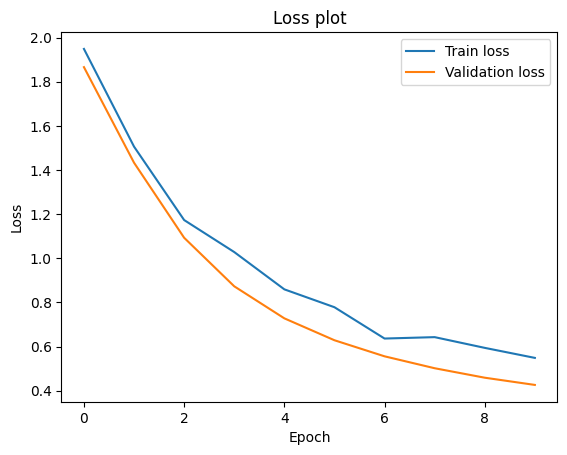

In [ ]:
epochs = [i for i in range (num_epochs)]

plt.plot(epochs, T_loss, label='Train loss')
plt.plot(epochs, v_loss, label='Validation loss')

# Add labels and a title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss plot')

# Add a legend to distinguish lines
plt.legend()

# Display the plot
plt.show()


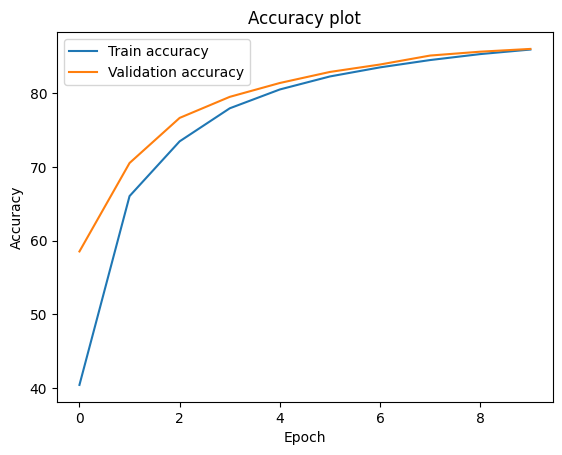

In [ ]:

plt.plot(epochs, T_acc, label='Train accuracy')
plt.plot(epochs, v_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')
plt.legend()
plt.show()


**Question:**
Based on the plots and the train metrics, how do you think this model is performing?

<font color='red'>The model is performing well.There are no significant signs of overfitting, as the gap between the training and validation metrics is not large, and both are improving concurrently.

<a name="1"></a>
## **9. Testing the model**
At the **very end** you should test your NN against some test set that is different from you training set and validation set and thus has never been touched during the training process:

In [ ]:
predict = []
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predict.extend(predicted.tolist())



    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
    print(len(predict))

Accuracy of the network on the 10000 test images: 86.82 %
10000


**Questions:**
* What is the difference between validation and test set? Why don't we use them all together as one test set?
* Do you think accuracy is a good metric for this dataset? Why?

<font color='red'>The validation set is used after each epoch or iteration, the model's performance is evaluated on the validation set to monitor improvements and make adjustments. The test set is used to evaluate the model's final performance.The model's performance is evaluated on the test set once, after training is complete, to report final accuracy metric. Combining validation and test sets can lead to overfitting to the validation set as well. By keeping the test set separate, you ensure that the final evaluation metric genuinely reflects the model's generalization ability.

<font color='red'>Yes, I think Accuracy is a good metric for this dataset since MNIST uses balanced classes and straightforward classification goals.

<a name="1"></a>
## **10. Confusion matrix**
Finally, with a confusion matrix you can check where your model misclassification classes are:

Confusion matrix, without normalization


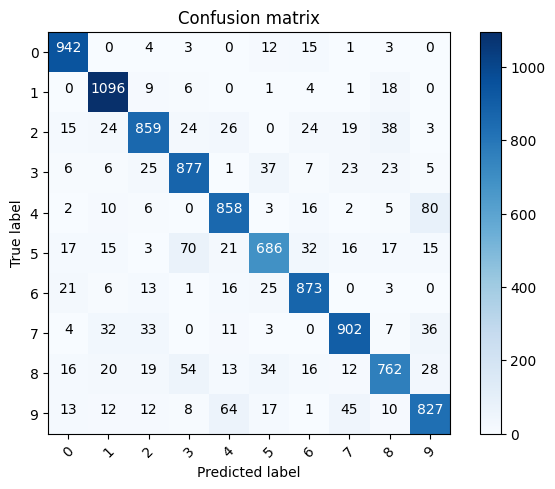

In [ ]:
#confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  #print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

x_test = []
y_test = []
for data, target in test_loader:
  x_test.extend(data)
  y_test.extend(target)

cm = confusion_matrix(y_test, predict)
plot_confusion_matrix(cm,list(range(10)))

**Questions:**
* Which numbers does the model get confused on the most?
* Which class is the easiest to predict? Why do you think the model is more confident on this class?



<font color='red'>It appears that the model confuses the most class 5. It often confuses class 5 with class 3, class 4 with class 9, class 8 with class 3, and class 9 with a 7.

<font color='red'>Class 1: 1096 instances of class 1 were correctly predicted as class 1.

<font color='red'>Class 1 has the highest number of correct predictions, suggesting that this class is the easiest for the model to predict. I suppose it is becauce it has more distinct and less ambiguous shapes compared to other digits.

<a name="1"></a>
## **11. Save model checkpoints**
<p align="justify"> Model checkpoint saving is a critical task in deep learning, involving the periodic saving of a model's parameters during training. This process allows you to resume interrupted training, implementing early stopping, and selecting the best-performing model. Checkpoints allow the training to resume from the last saved state, preventing loss of progress, and supporting hyperparameter tuning and experimentation. They enable efficient model selection and are crucial for deploying trained models for inference, ensuring that the trained model can be used reliably without the need to retrain it from scratch, ultimately improving the efficiency and robustness of deep learning model development.</p>

In [ ]:
torch.save(model.state_dict(), 'model.ckpt')